In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats.mstats import winsorize
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/linear_model_dataset/AmesHousing.csv')

In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.shape

(2930, 82)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
missing_cols = df.columns[df.isna().sum() > 0].tolist()
missing_cols

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [ ]:
df_clean = df.dropna()

In [ ]:
df['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', nan, 'Mix'], dtype=object)

In [ ]:
df['Garage Finish'].isna().sum()

np.int64(159)

In [ ]:
df['Electrical'].value_counts()

,count
Electrical,
SBrkr,2682
FuseA,188
FuseF,50
FuseP,8
Mix,1


In [ ]:
df['Electrical'].fillna('SBrkr', inplace=True)

/tmp/ipython-input-2098062097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna('SBrkr', inplace=True)


In [ ]:
df['Alley'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['Misc Feature'].fillna('None', inplace=True)
df['Pool QC'].fillna('No Pool', inplace=True)
df['Fireplace Qu'].fillna('Gd', inplace=True)
df['Garage Type'].fillna('Attchd', inplace=True)
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Qual'].fillna('Unf', inplace=True)
df['Lot Frontage'].fillna(math.ceil(df['Lot Frontage'].mean()), inplace=True)
df['Mas Vnr Type'].fillna('BrkCmn', inplace=True)
df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mean(), inplace=True)
df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mean(), inplace=True)
df['Bsmt Full Bath'].fillna(math.ceil(df['Bsmt Full Bath'].mean()), inplace=True)
df['Bsmt Half Bath'].fillna(math.ceil(df['Bsmt Half Bath'].mean()), inplace=True)
df['Garage Yr Blt'].fillna(math.ceil(df['Garage Yr Blt'].mean()), inplace=True)
df['Garage Area'].fillna(math.ceil(df['Garage Area'].mean()), inplace=True)

/tmp/ipython-input-3406007893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna('None', inplace=True)
/tmp/ipython-input-3406007893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df = df.drop(columns=['Order','PID', 'MS SubClass', 'MS Zoning'])

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

In [ ]:
len(numeric_df.columns)

36

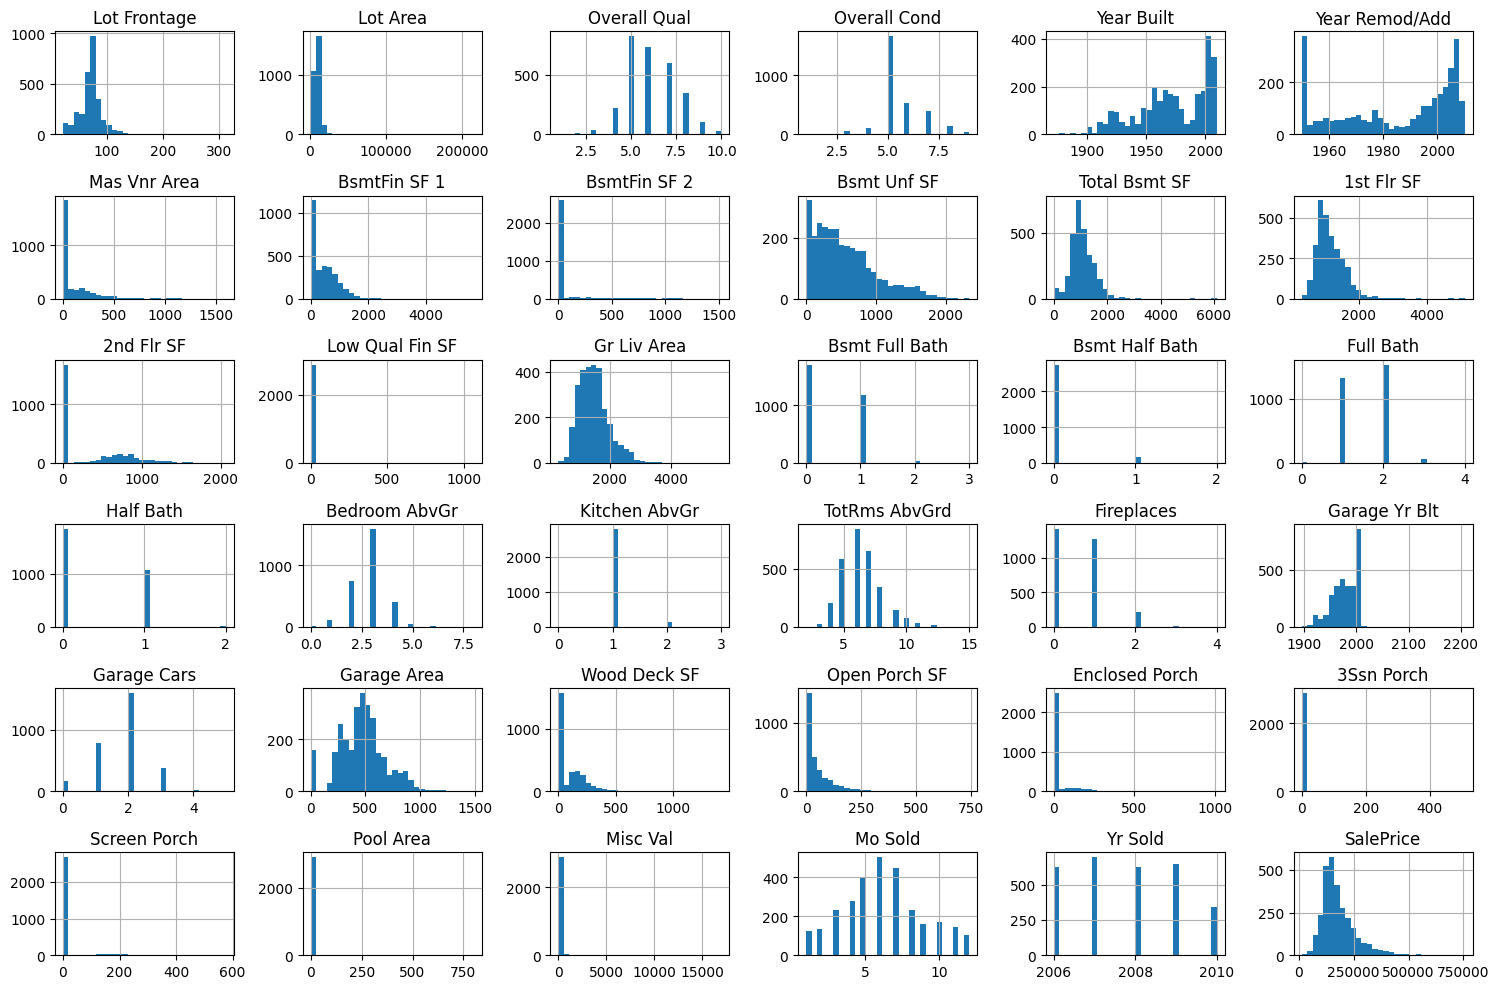

In [ ]:
numeric_df.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

<Axes: >

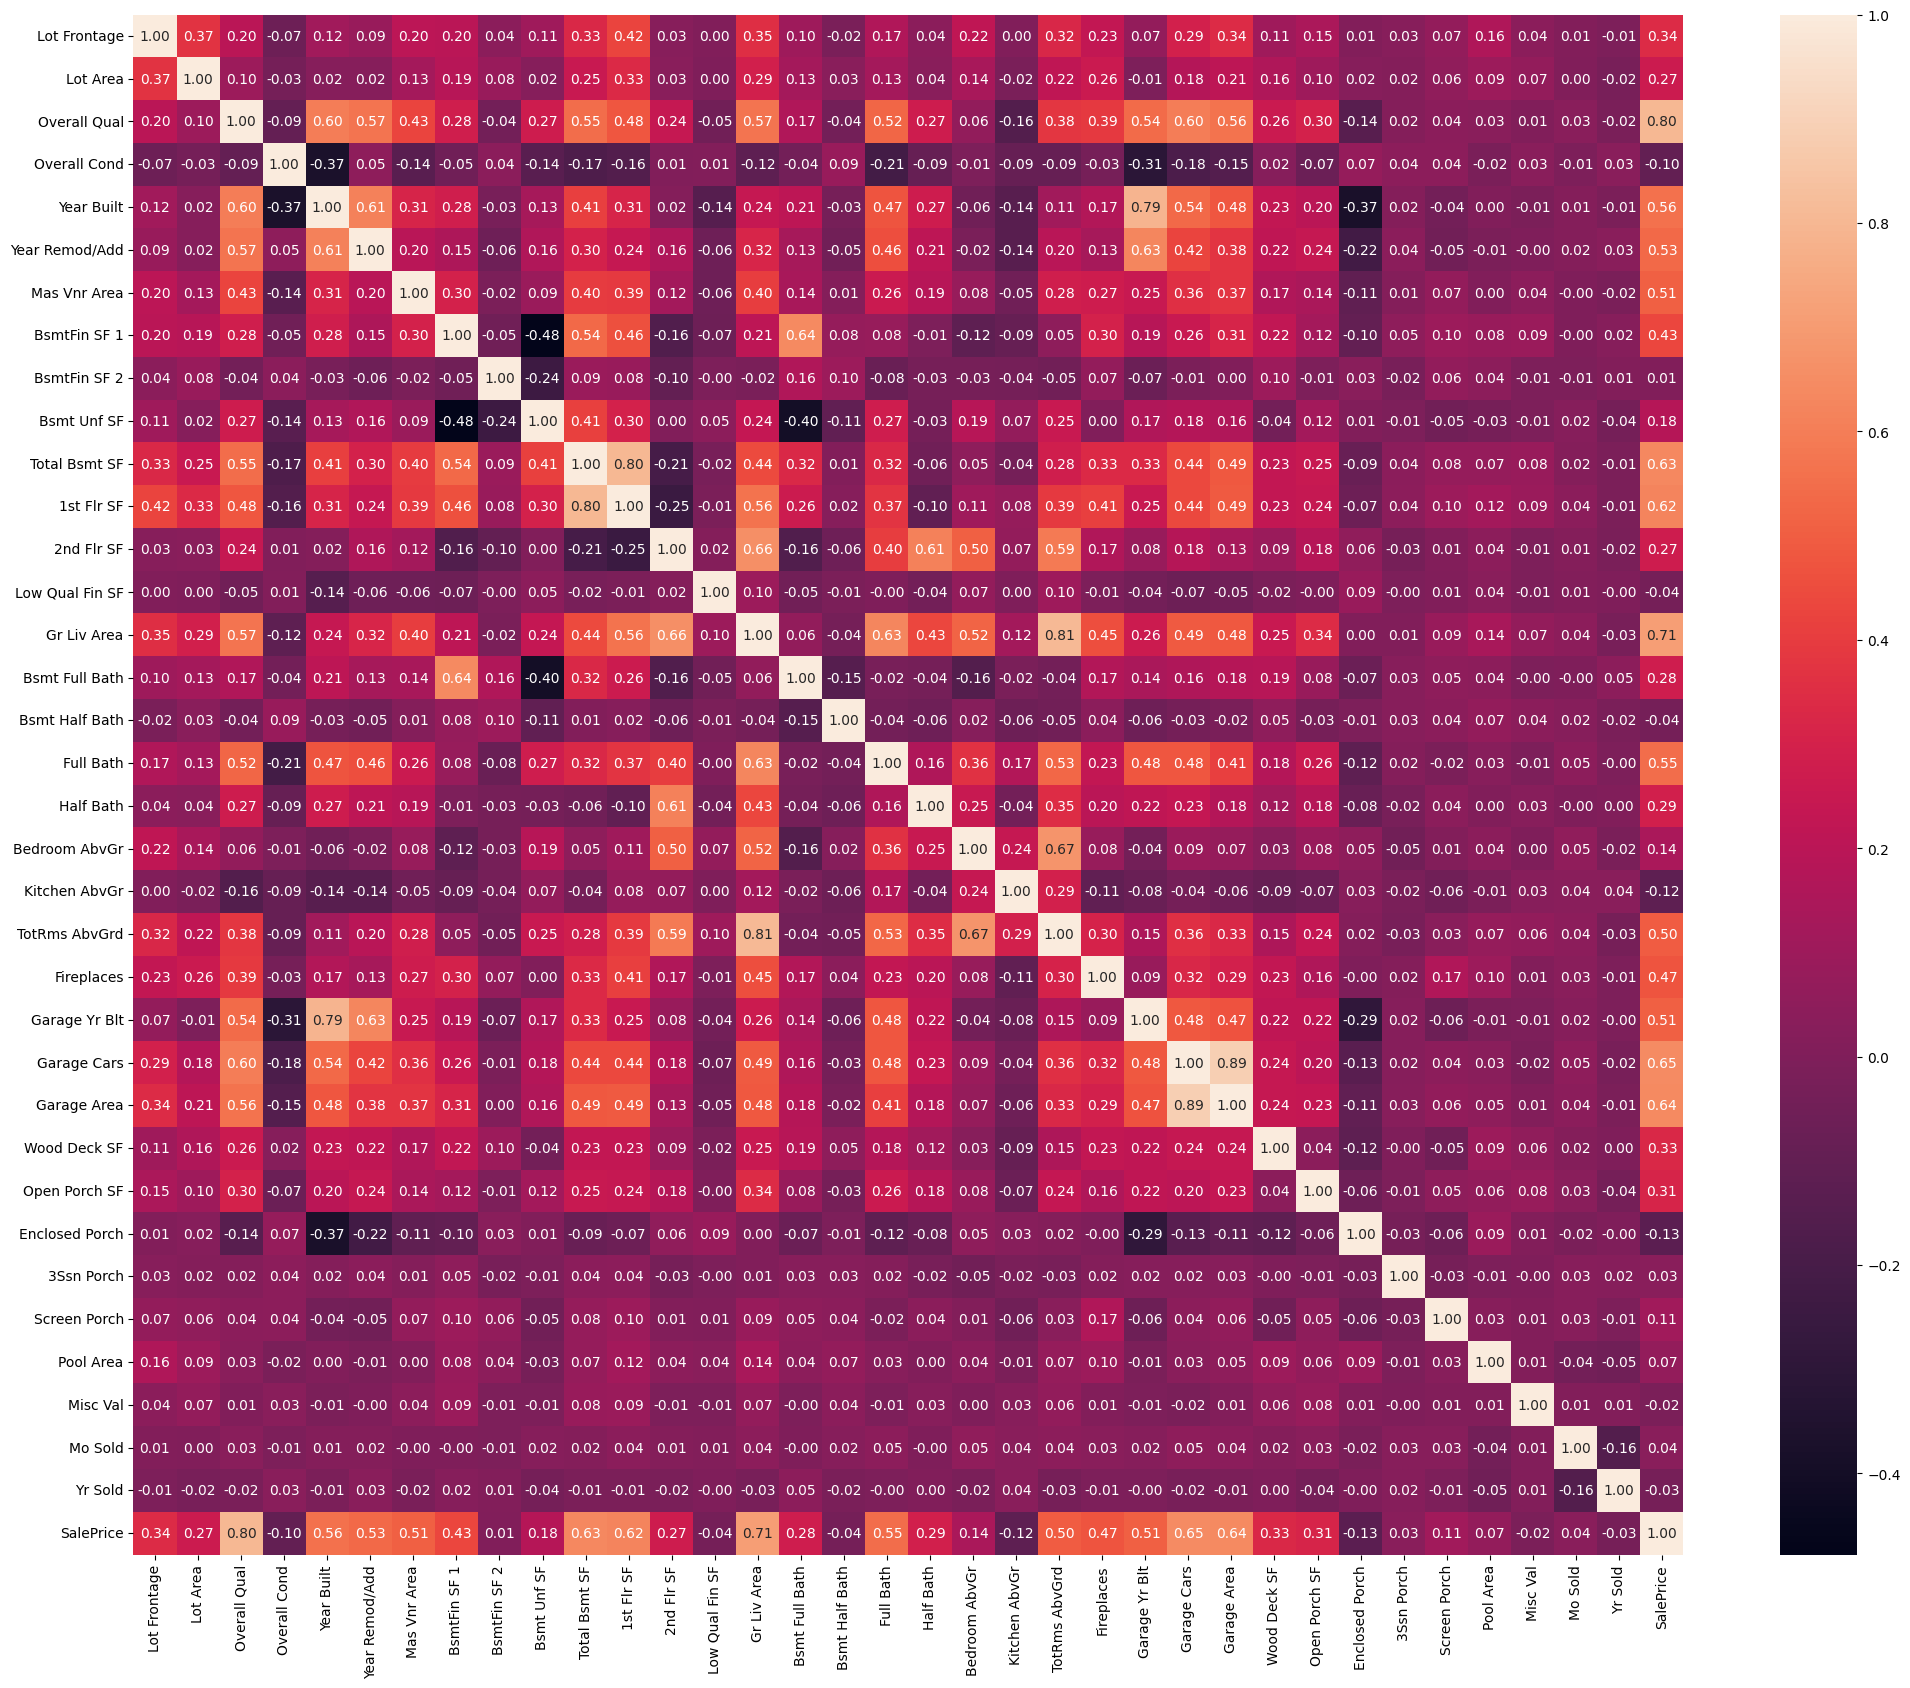

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')

In [ ]:
display(numeric_df.corr().sort_values(by='SalePrice', ascending=False)['SalePrice'])

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647562
Garage Area,0.640385
Total Bsmt SF,0.632105
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


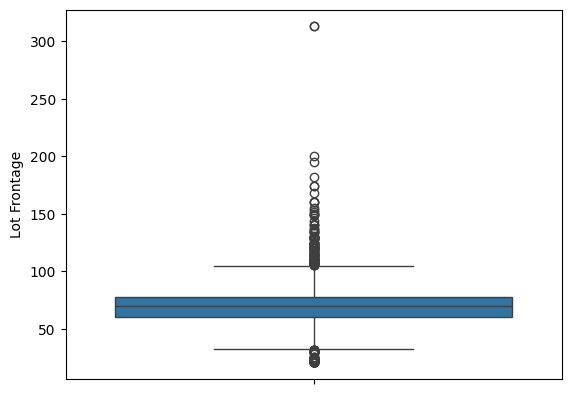

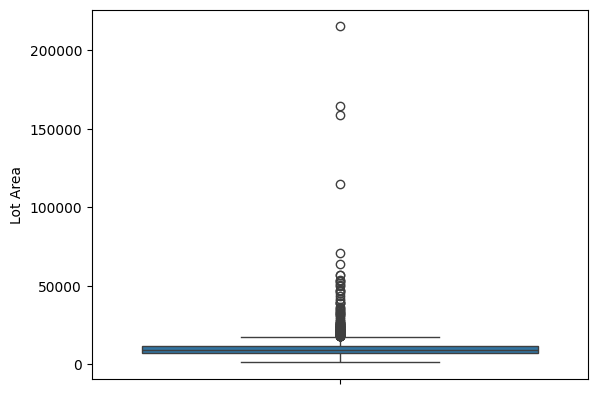

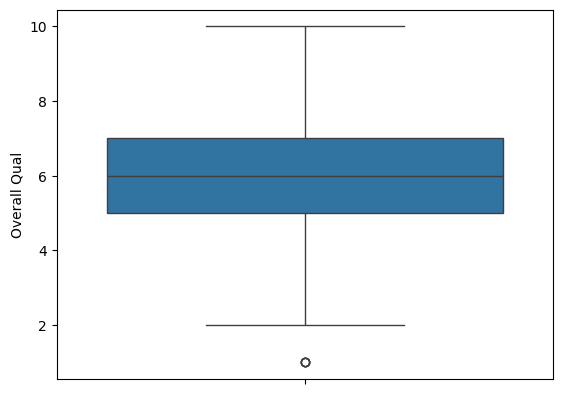

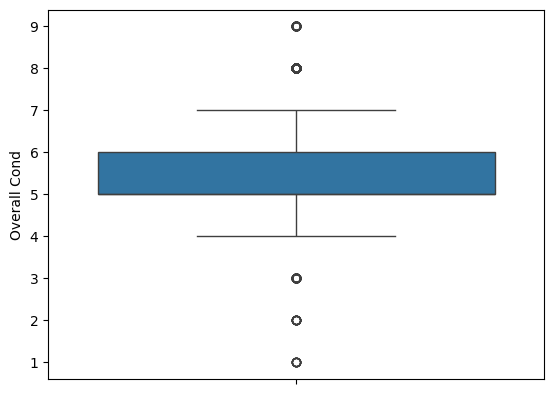

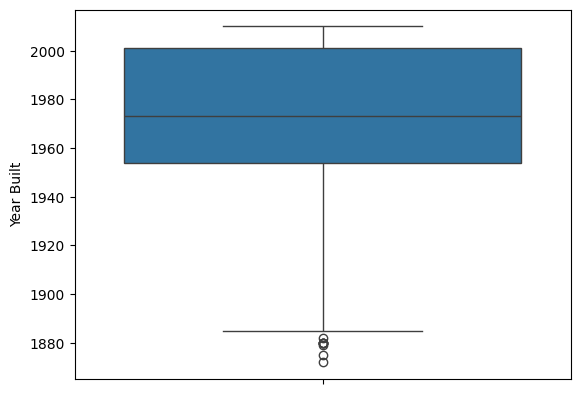

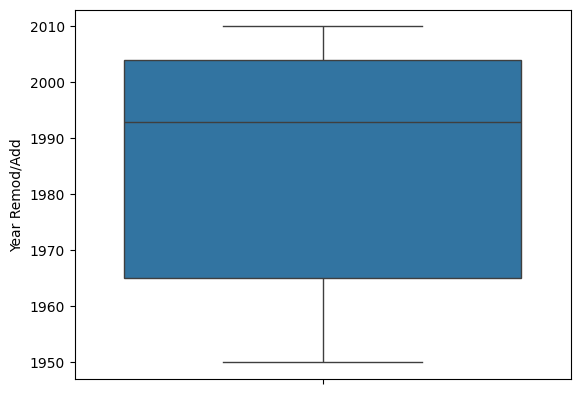

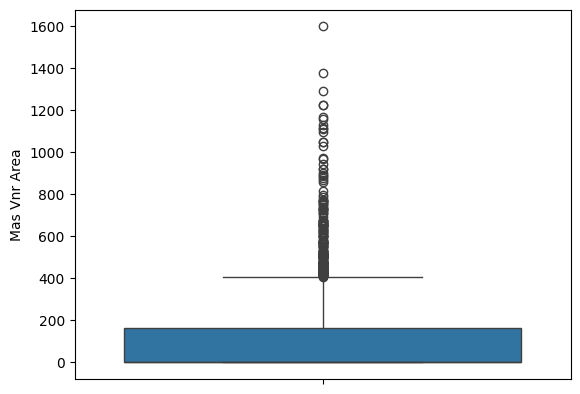

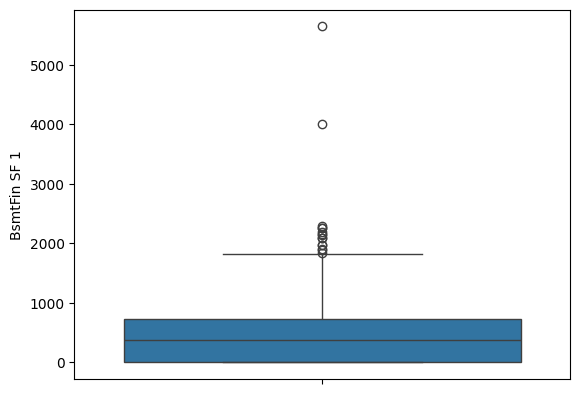

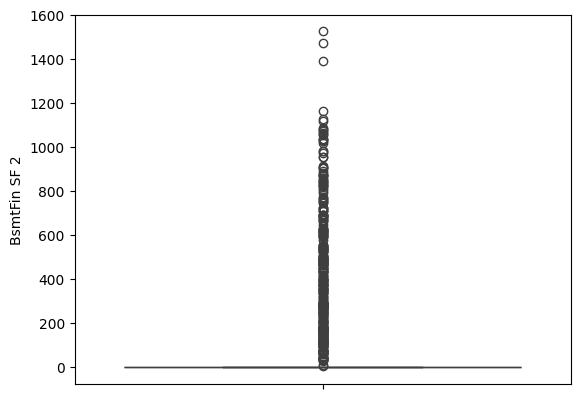

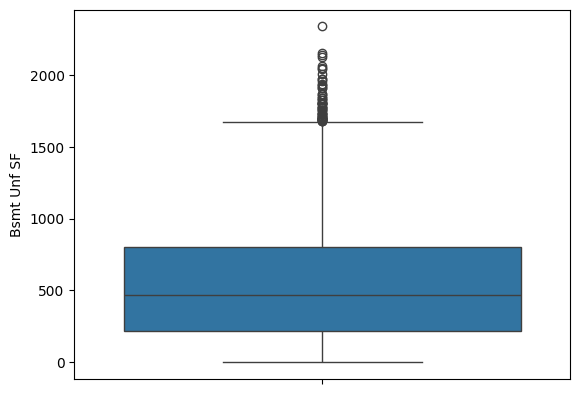

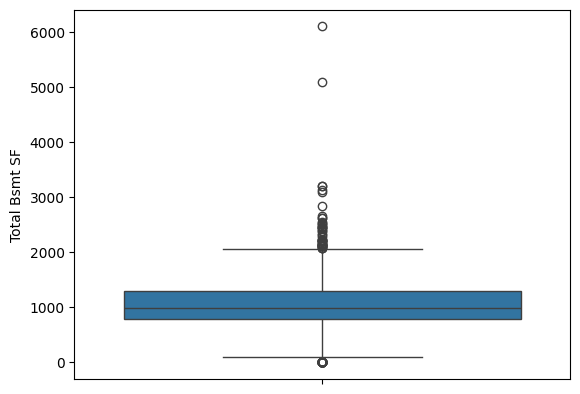

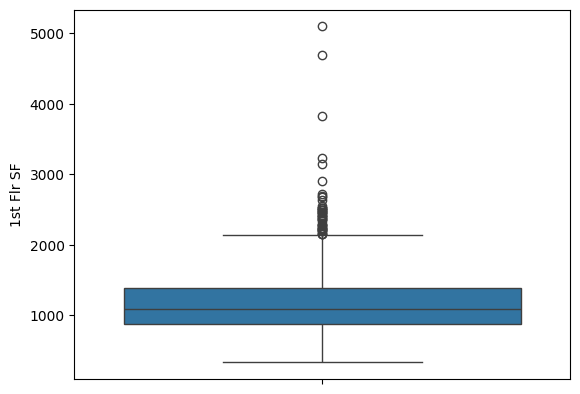

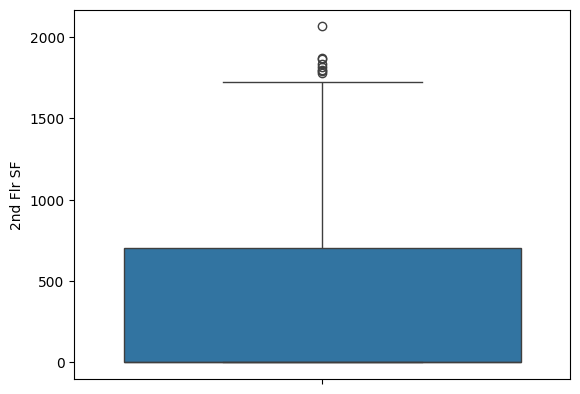

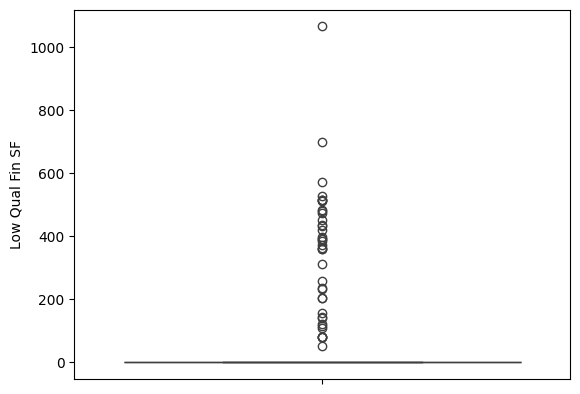

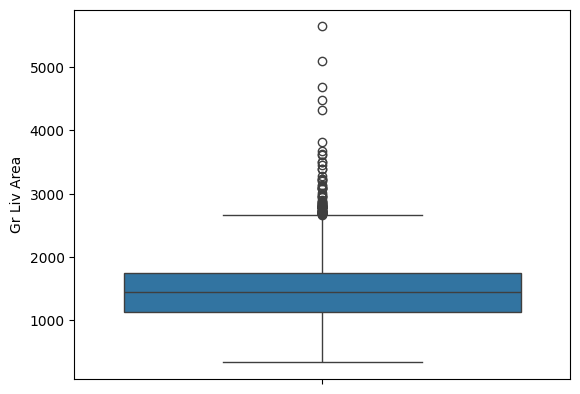

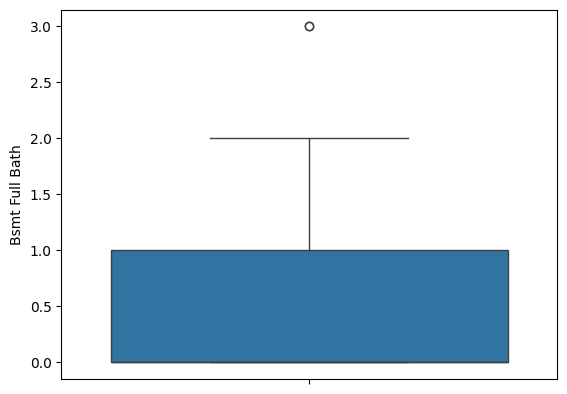

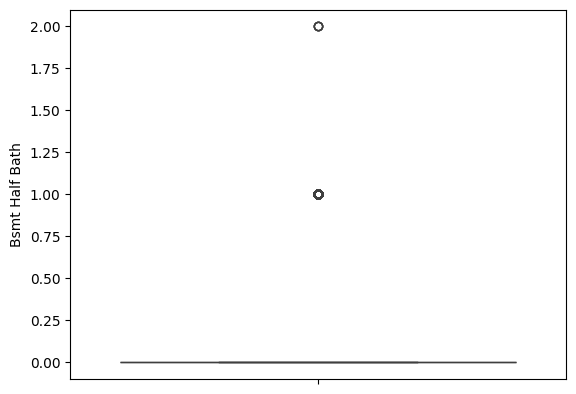

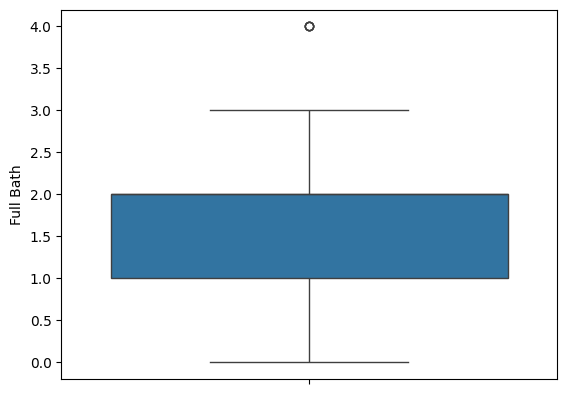

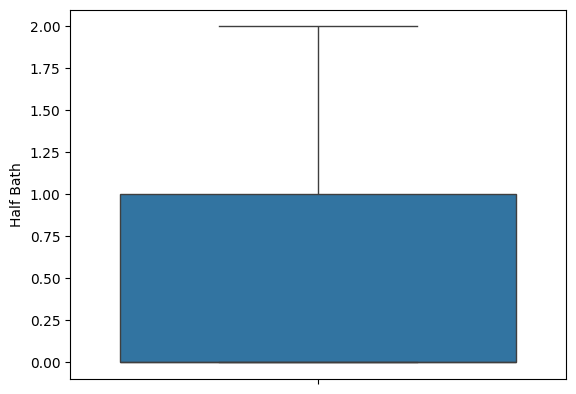

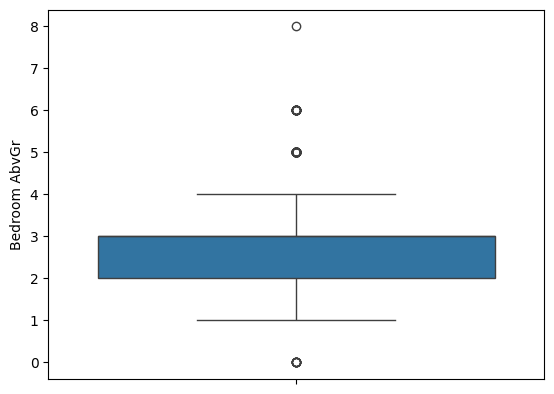

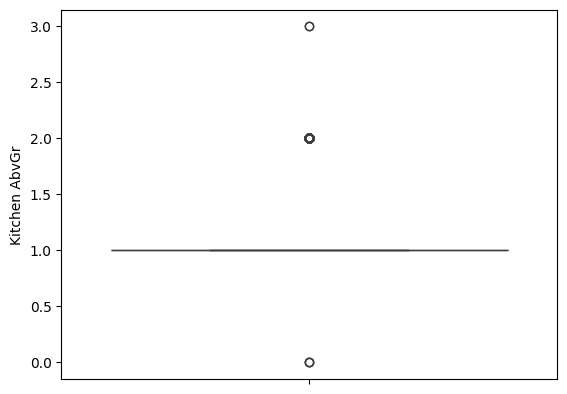

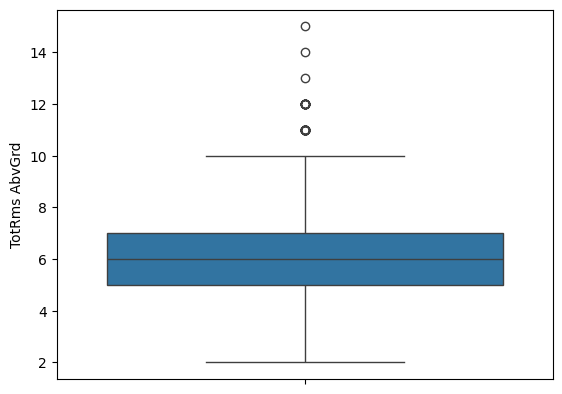

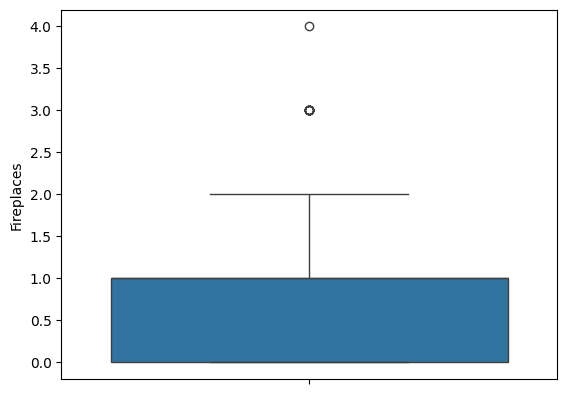

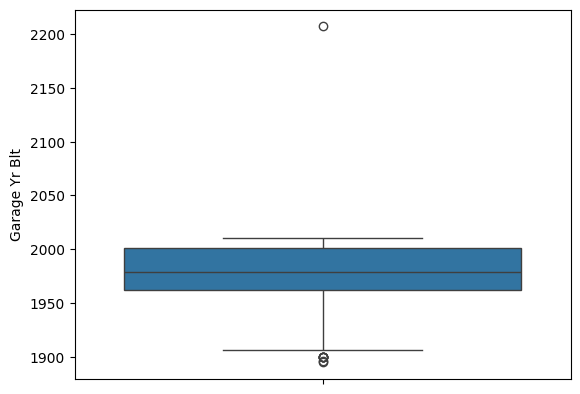

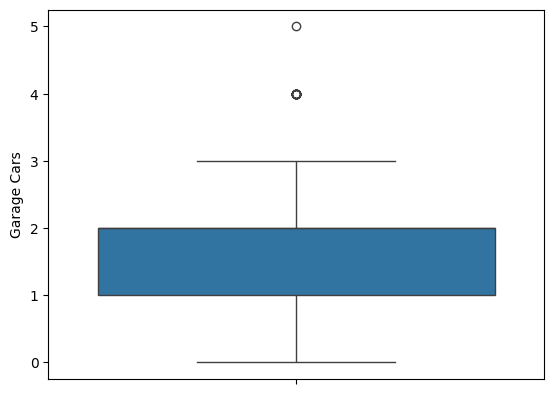

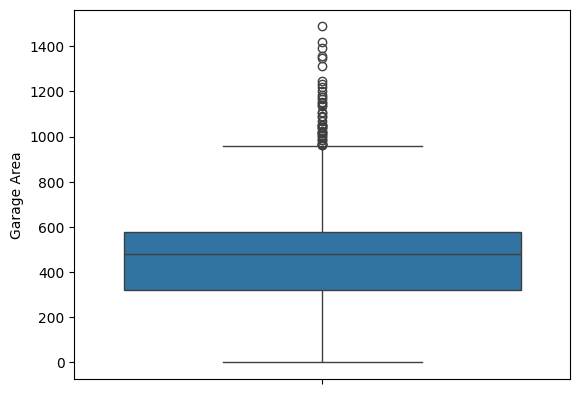

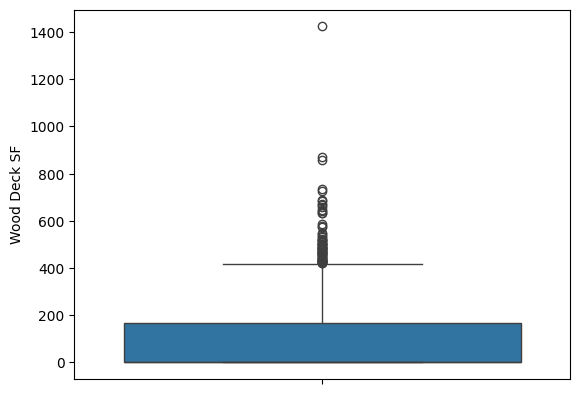

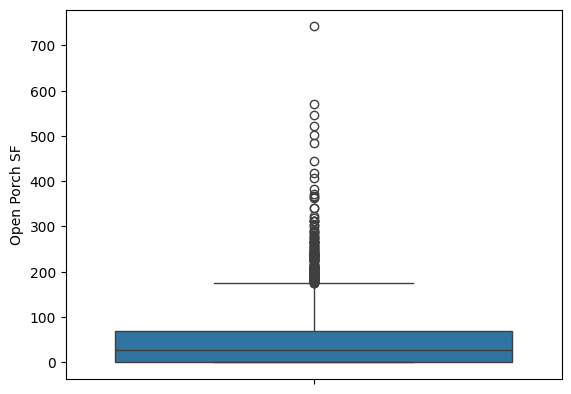

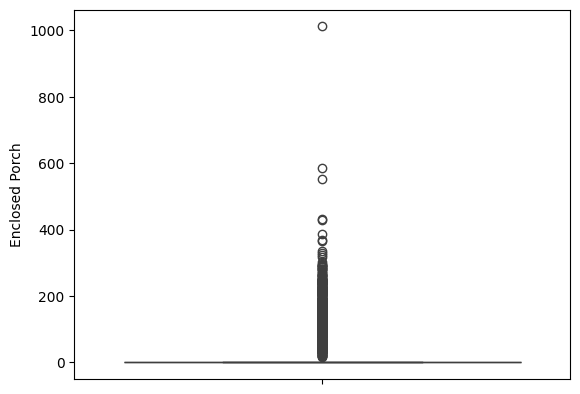

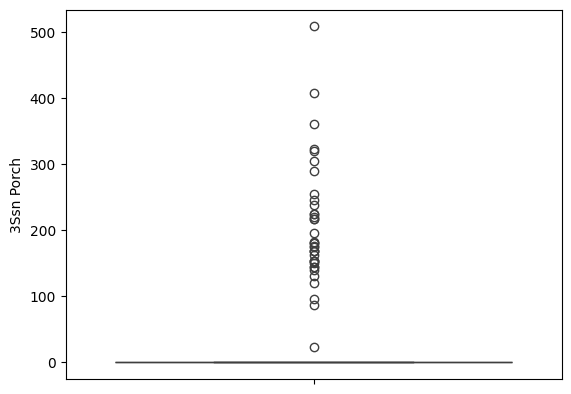

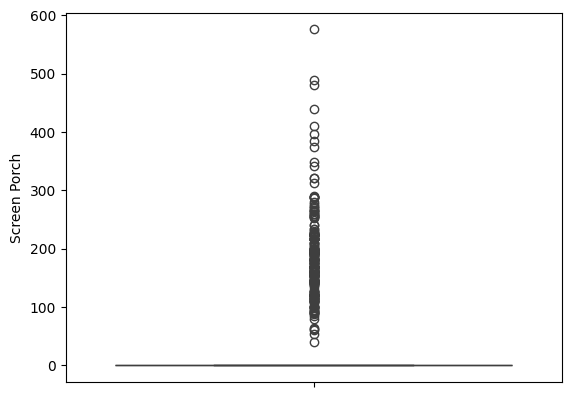

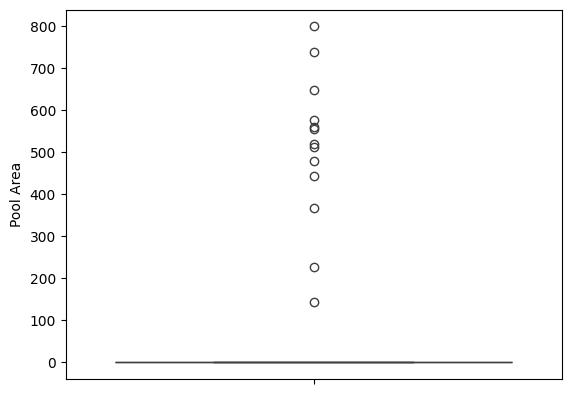

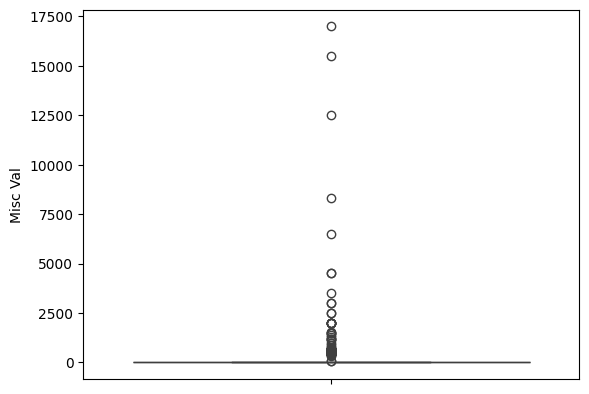

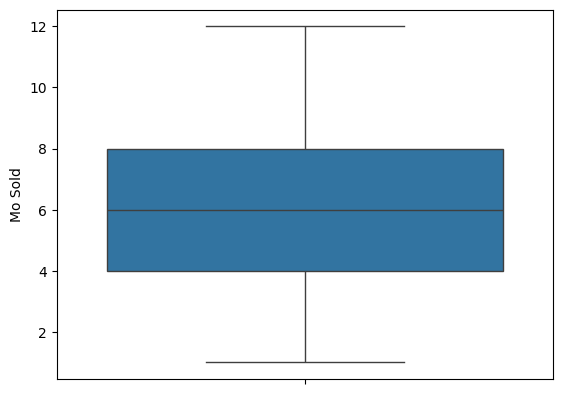

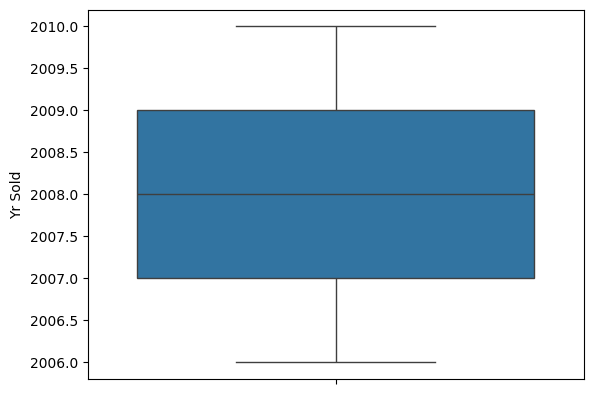

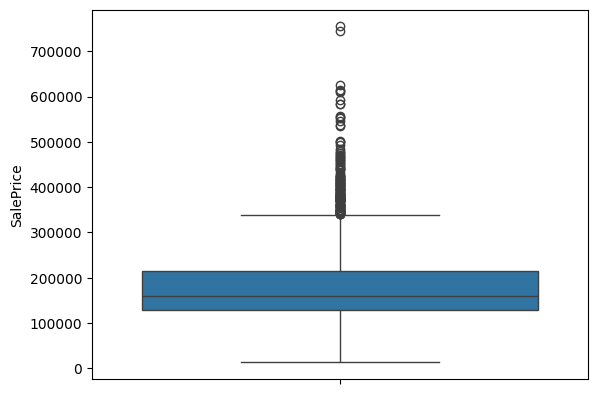

In [ ]:
for n_fea in numeric_df:
  sns.boxplot(df[n_fea])
  plt.show()

In [ ]:
def detect_outliers_iqr (series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((series.values < lower_bound) | (series.values > upper_bound)).any()

outlier_columns = [col for col in numeric_df.columns if detect_outliers_iqr(numeric_df[col])]

numeric_df_processed = numeric_df.copy()

for col in outlier_columns:
  numeric_df_processed[col] = winsorize(numeric_df_processed[col], limits=[0.05, 0.05])

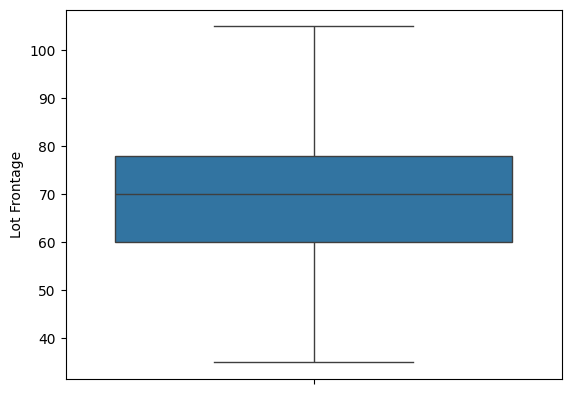

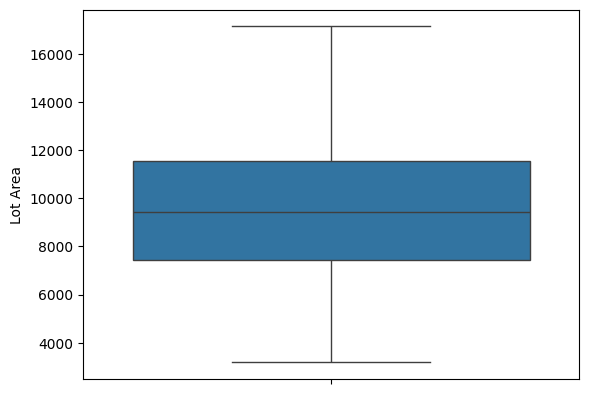

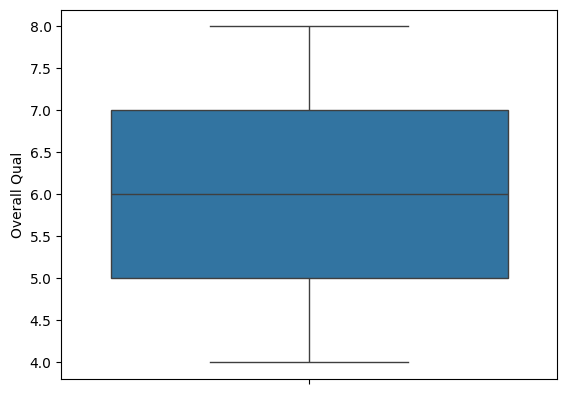

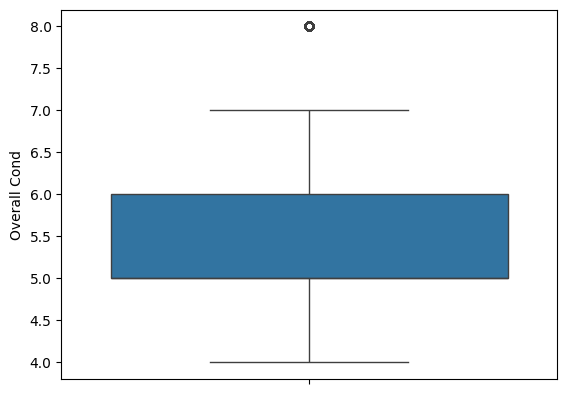

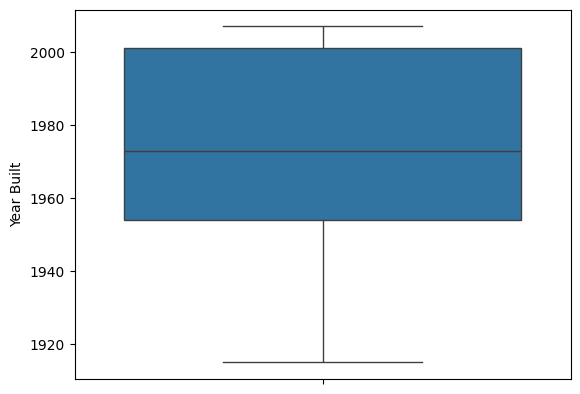

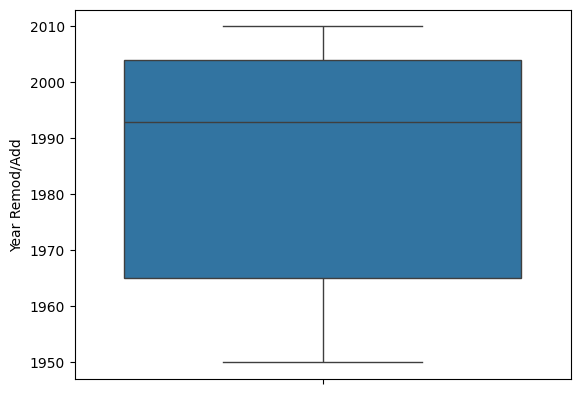

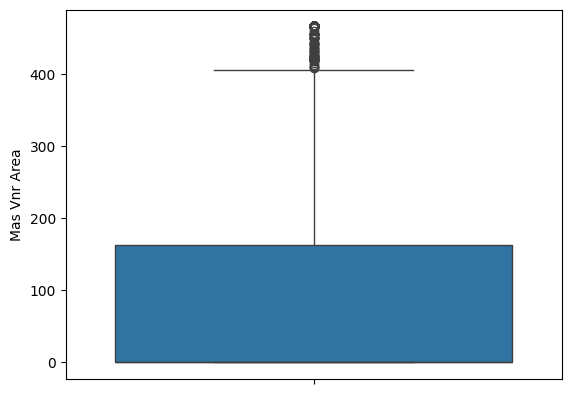

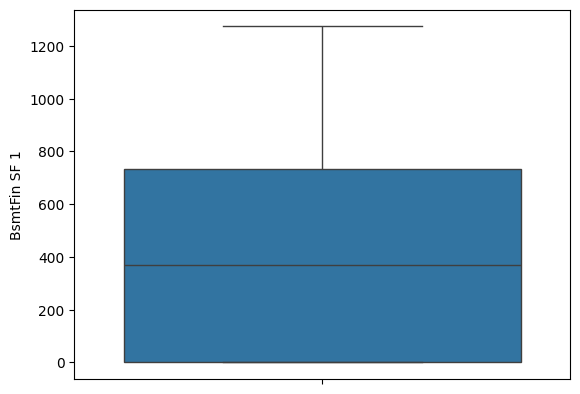

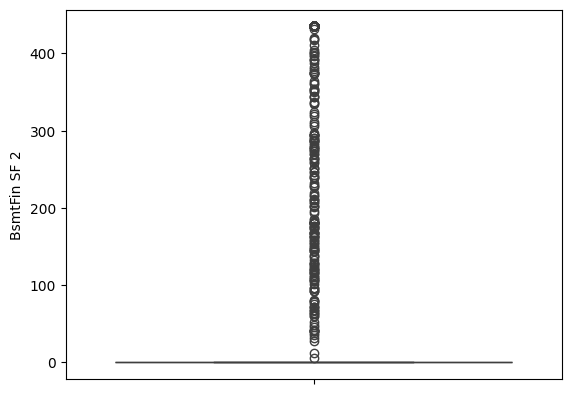

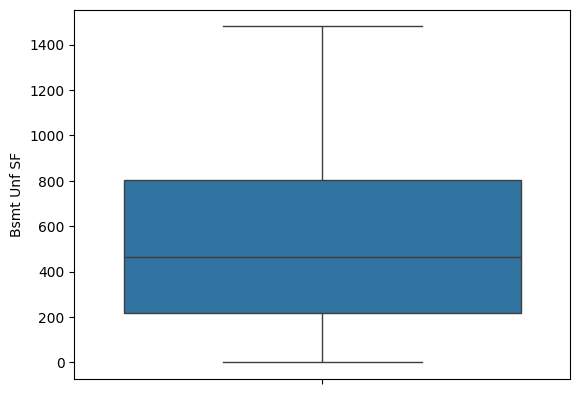

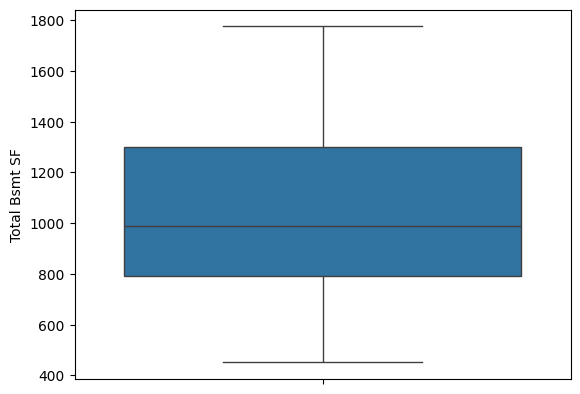

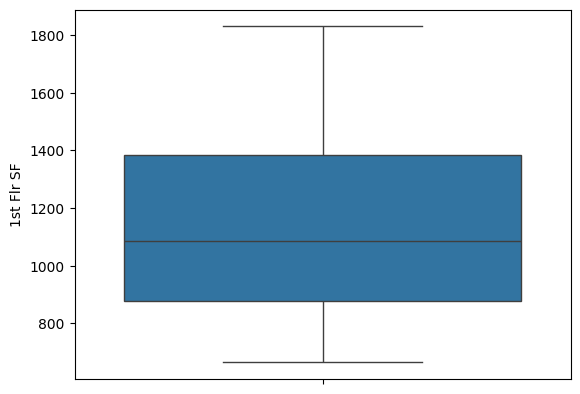

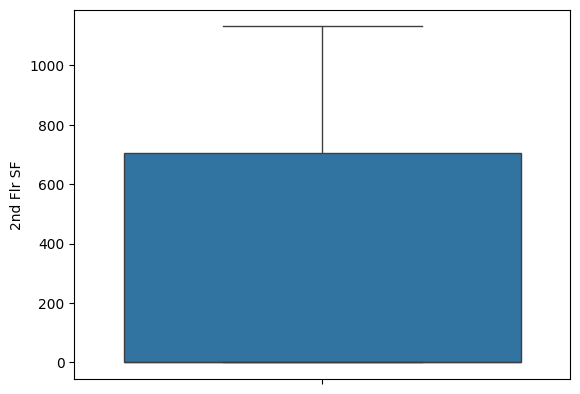

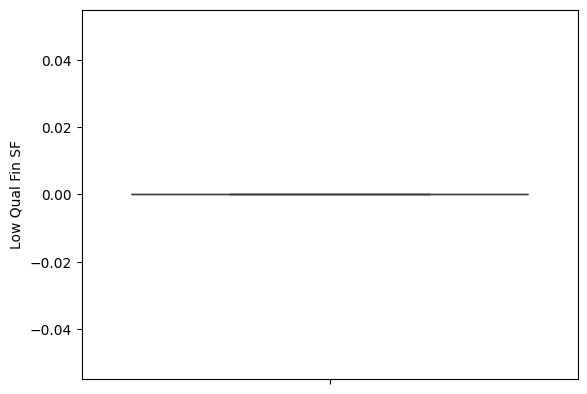

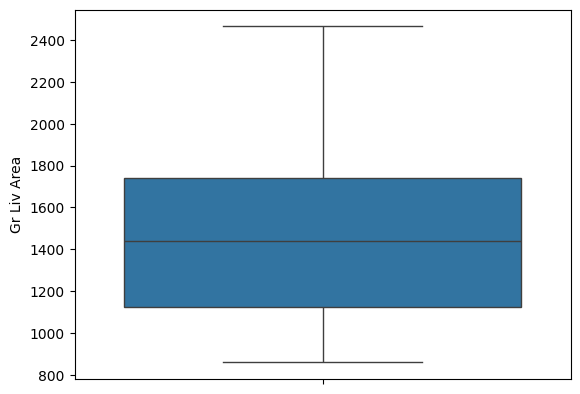

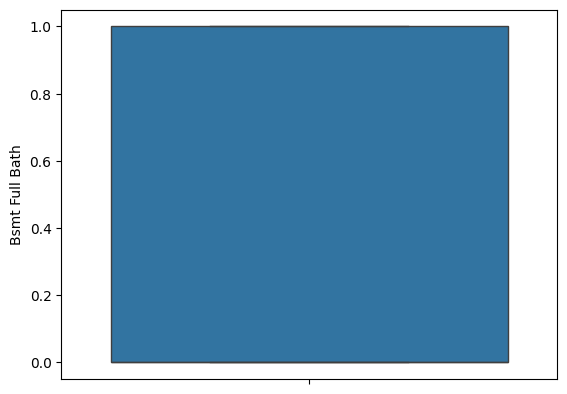

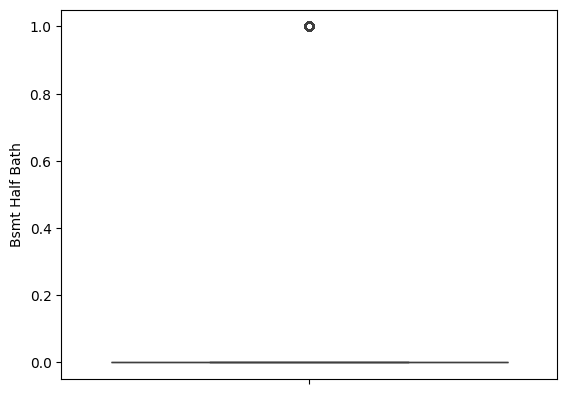

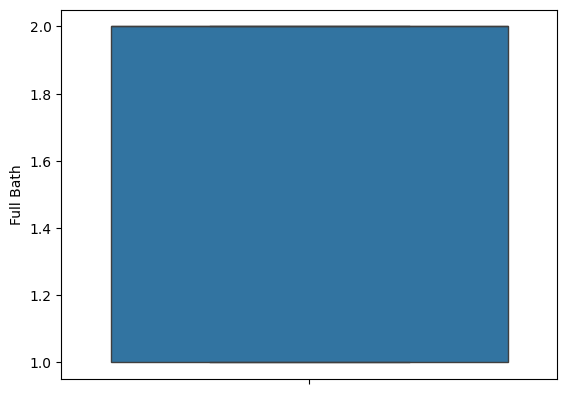

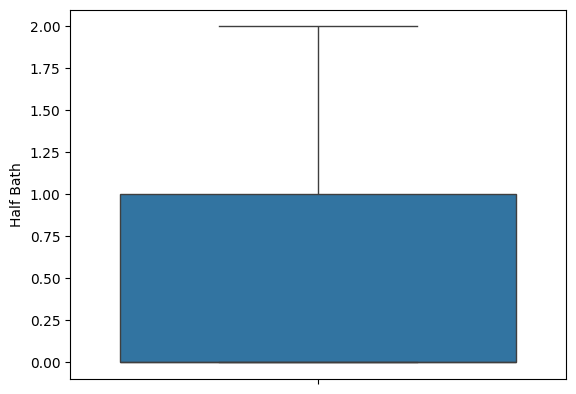

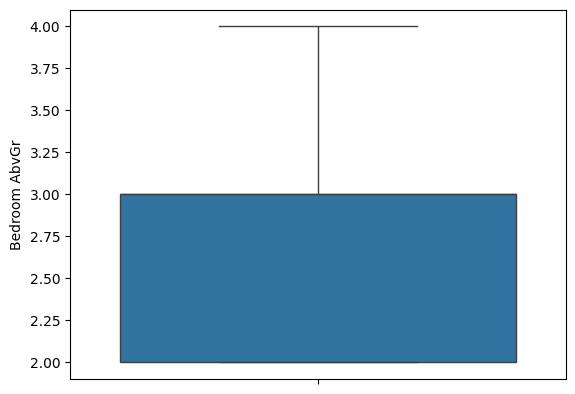

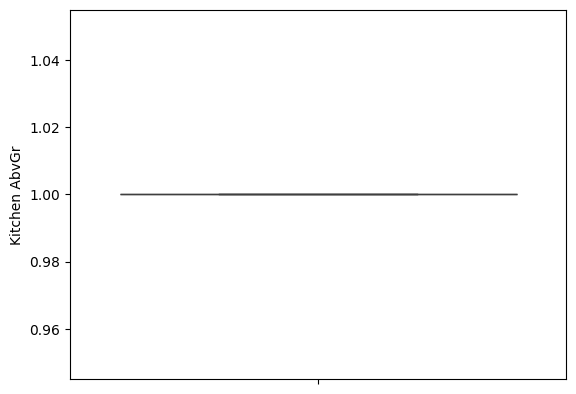

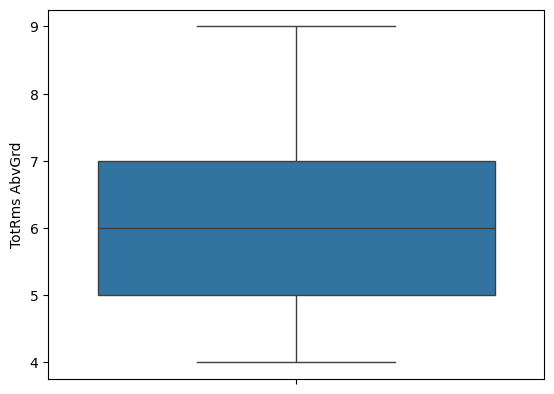

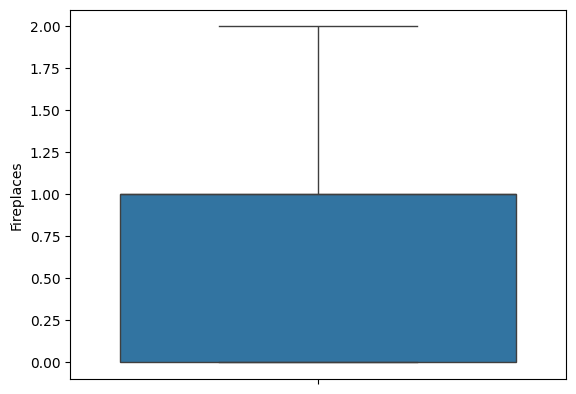

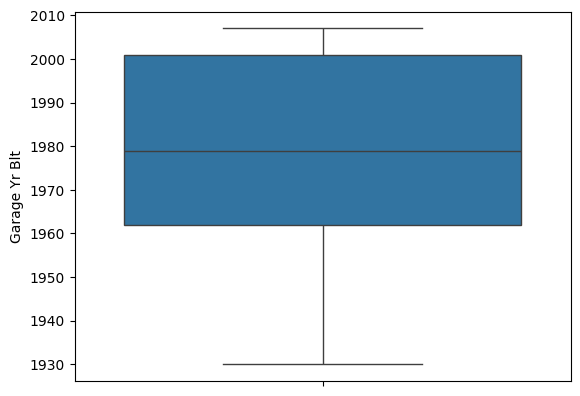

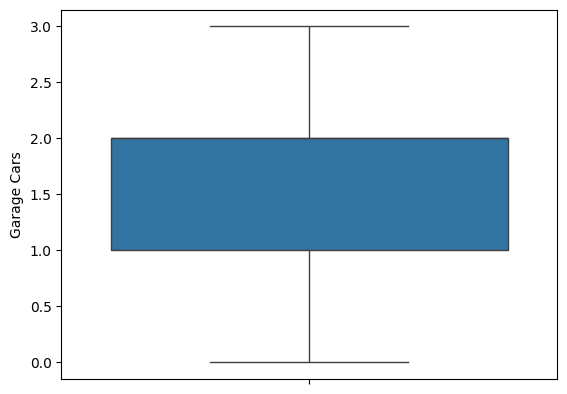

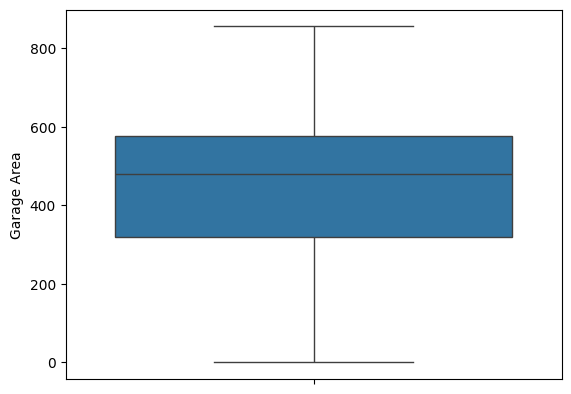

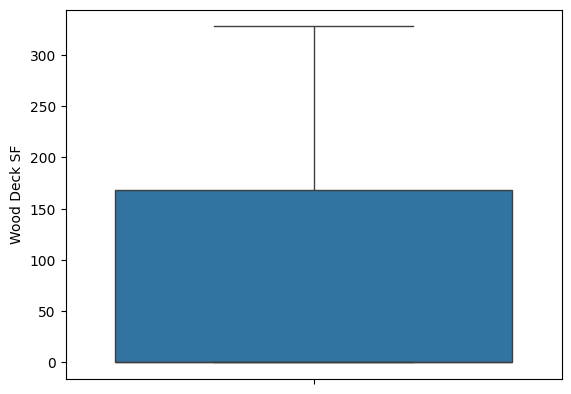

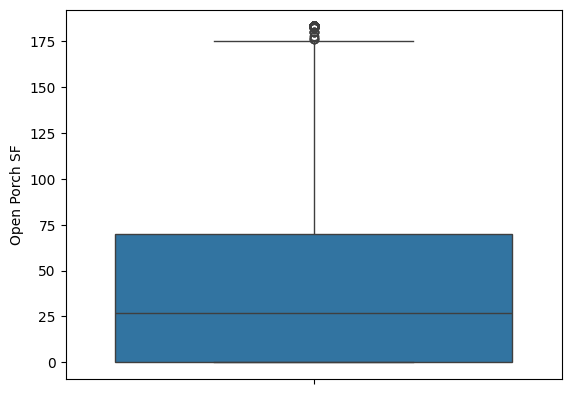

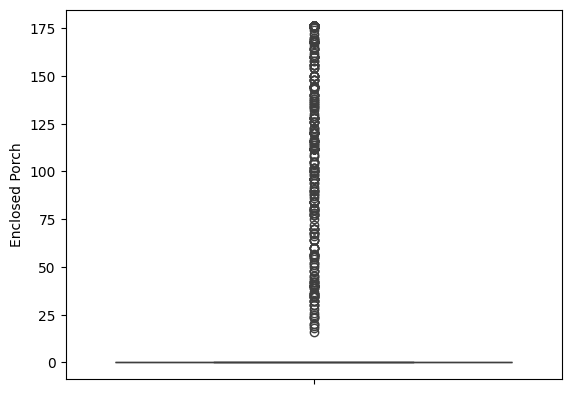

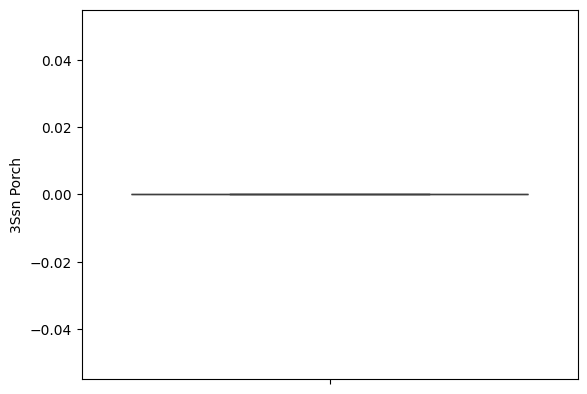

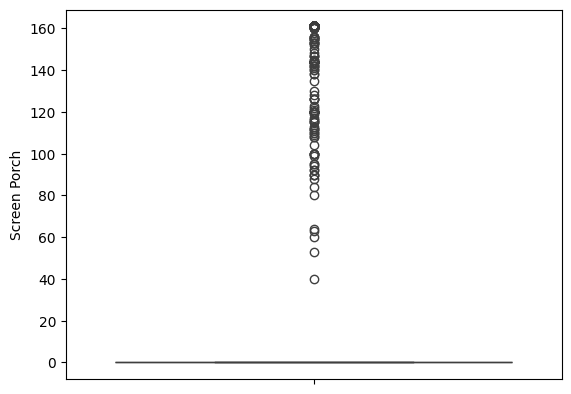

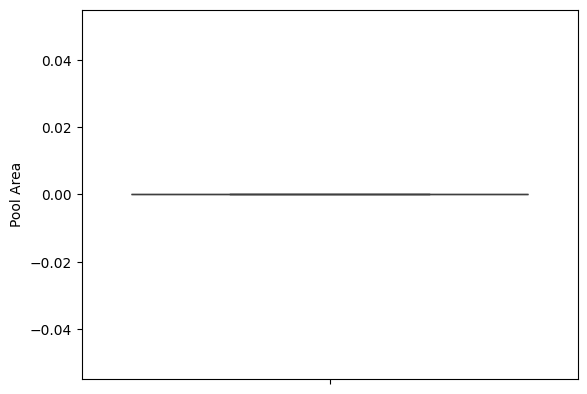

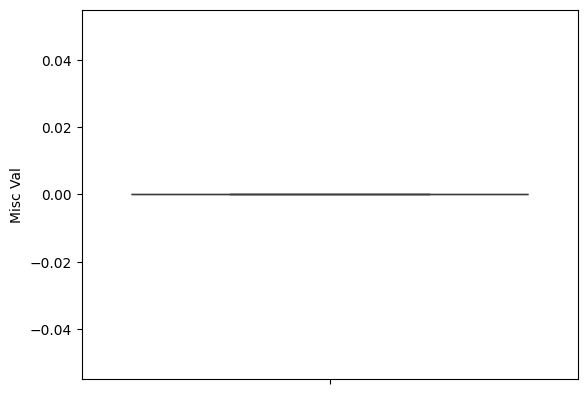

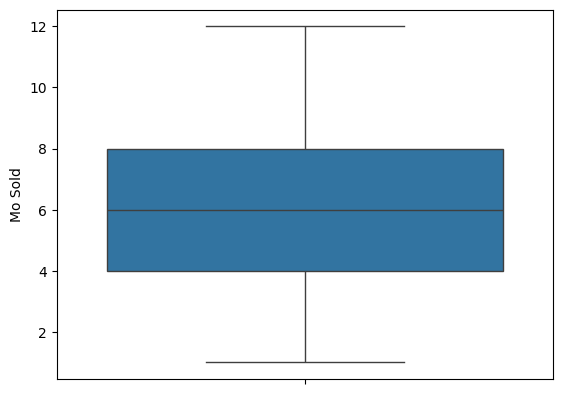

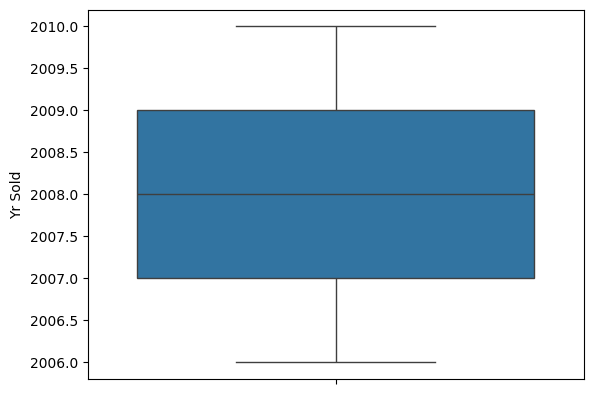

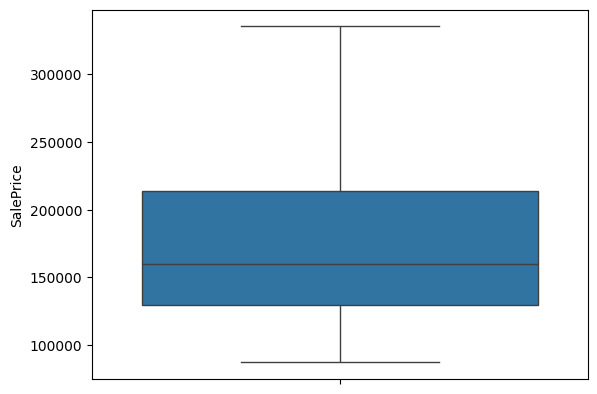

In [ ]:
for n_clean in numeric_df_processed:
  sns.boxplot(numeric_df_processed[n_clean])
  plt.show()

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(df, categorical_col, target_col):
    """Perform chi-square test between categorical variable and categorical target"""
    contingency_table = pd.crosstab(df[categorical_col], df['SalePrice'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Cramér's V for effect size
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    return {
        'chi2': chi2,
        'p_value': p_value,
        'cramers_v': cramers_v,
        'contingency_table': contingency_table
    }

# Test all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
results = {}

for col in categorical_cols:
    if col != 'SalePrice':  # replace with your target column name
        results[col] = chi_square_test(df, col, 'SalePrice')

# Sort by Cramér's V (strength of association)
sorted_results = sorted(results.items(), key=lambda x: x[1]['cramers_v'], reverse=True)

for col, result in sorted_results:
    print(f"{col}: Cramér's V = {result['cramers_v']:.3f}, p-value = {result['p_value']:.3f}")

Street: Cramér's V = 0.837, p-value = 0.000
Exter Qual: Cramér's V = 0.797, p-value = 0.000
Bsmt Qual: Cramér's V = 0.768, p-value = 0.000
Sale Condition: Cramér's V = 0.712, p-value = 0.000
Condition 2: Cramér's V = 0.710, p-value = 0.000
Garage Finish: Cramér's V = 0.706, p-value = 0.000
Central Air: Cramér's V = 0.699, p-value = 0.000
Kitchen Qual: Cramér's V = 0.695, p-value = 0.000
Heating: Cramér's V = 0.691, p-value = 0.000
Functional: Cramér's V = 0.664, p-value = 0.000
Bsmt Cond: Cramér's V = 0.660, p-value = 0.000
Bsmt Exposure: Cramér's V = 0.653, p-value = 0.000
Garage Qual: Cramér's V = 0.650, p-value = 0.000
Foundation: Cramér's V = 0.643, p-value = 0.000
Lot Shape: Cramér's V = 0.638, p-value = 0.000
Electrical: Cramér's V = 0.637, p-value = 0.000
Exter Cond: Cramér's V = 0.635, p-value = 0.000
Heating QC: Cramér's V = 0.635, p-value = 0.000
Fireplace Qu: Cramér's V = 0.633, p-value = 0.000
Exterior 1st: Cramér's V = 0.629, p-value = 0.000
Garage Type: Cramér's V = 0.623

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

In [ ]:
df_encoded.columns.tolist()

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'Lot Shape_IR1',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Land Contour_Bnk',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Lot Config_Corner',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Land Slope_G

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            0 non-null      int64  
 1   PID              0 non-null      int64  
 2   MS SubClass      0 non-null      int64  
 3   MS Zoning        0 non-null      object 
 4   Lot Frontage     0 non-null      float64
 5   Lot Area         0 non-null      int64  
 6   Street           0 non-null      object 
 7   Alley            0 non-null      object 
 8   Lot Shape        0 non-null      object 
 9   Land Contour     0 non-null      object 
 10  Utilities        0 non-null      object 
 11  Lot Config       0 non-null      object 
 12  Land Slope       0 non-null      object 
 13  Neighborhood     0 non-null      object 
 14  Condition 1      0 non-null      object 
 15  Condition 2      0 non-null      object 
 16  Bldg Type        0 non-null      object 
 17  House Style      0 non-null      

In [ ]:
df_cleaned = pd.merge(df_encoded, numeric_df_processed, how='inner')

In [ ]:
df_cleaned

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,True,False,False,False,False,True,False
1,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,True,False,False,False,False,True,False
2,41.0,4920,8,5,2001,2001,0.0,616.0,0.0,722.0,...,False,False,False,True,False,False,False,False,True,False
3,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,False,False,False,True,False,False,False,False,True,False
4,39.0,5389,8,5,1995,1996,0.0,1180.0,0.0,415.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,641.0,...,False,False,False,True,False,False,False,False,True,False
1022,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,True,False,False,False,False,True,False
1023,70.0,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,True,False,False,False,False,True,False
1024,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
X = df_cleaned.drop(columns=['SalePrice'])
y = df_cleaned['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {'Ridge' : {'model' : Ridge(), 'params' : {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}},
          'Lasso' : {'model' : Lasso(), 'params' : {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}},
          'ElasticNet' : {'model': ElasticNet(), 'params' : {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio' : [0.2, 0.5, 0.8]}}}

In [ ]:
for name, config in models.items():
    pipe = make_pipeline(StandardScaler(), config['model'])

    param_grid = {}
    for param_name, param_values in config['params'].items():
        param_grid[f'{name.lower()}__' + param_name] = param_values

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)

    r2_train = (r2_score(y_train, y_train_pred))
    mse_train = mean_squared_error(y_train, y_train_pred)

    r2_test = (r2_score(y_test, y_test_pred))
    mse_test = mean_squared_error(y_test, y_test_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mse_test)

    print(f'Model: {name}')
    print(f'r2 train: {r2_train:.4f}')
    print(f'Train Mean Squared Error: {mse_train:.2f}')
    print(f'r2 test: {r2_test:.4f}')
    print(f'Test Mean Squared Error: {mse_test:.2f}')
    print(f'Mean Absolute Error: {mae_test:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}\n')

Model: Ridge
r2 train: 0.9355
Train Mean Squared Error: 109572163.90
r2 test: 0.8900
Test Mean Squared Error: 202155534.27
Mean Absolute Error: 10370.02
Root Mean Squared Error: 14218.14



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.643e+09, tolerance: 1.067e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.325e+09, tolerance: 1.084e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+10, tolerance: 1.192e

Model: Lasso
r2 train: 0.9381
Train Mean Squared Error: 105124860.95
r2 test: 0.8974
Test Mean Squared Error: 188565437.82
Mean Absolute Error: 10063.25
Root Mean Squared Error: 13731.91



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.921e+10, tolerance: 1.067e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+10, tolerance: 1.084e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.151e+10, tolerance: 1.192e

Model: ElasticNet
r2 train: 0.9321
Train Mean Squared Error: 115336929.87
r2 test: 0.8896
Test Mean Squared Error: 202914033.41
Mean Absolute Error: 10368.53
Root Mean Squared Error: 14244.79

